# Homework 1 - Vgg16, Cats and Dogs Redux

### Todo

- Create directory structure for competition data
- Intro including link to Kaggle competition homepage
- Perhaps remove sample section (not really necessary)
- Reorganise according to the following plan:

### Action Plan
- Create Validation and Sample sets
- Rearrange image files into their respective directories
- Finetune and Train model
- Generate predictions
- Validate predictions
- Submit predictions to Kaggle

In [1]:
%matplotlib inline

In [12]:
#path = "/home/ubuntu/nbs/hw1/sample"
path = "/home/ubuntu/nbs/homeworks/dogscats_redux/sample"

In [3]:
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots
import csv

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [4]:
batch_size=64
no_of_epochs = 3

In [5]:
from vgg16 import Vgg16

In [9]:
vgg = Vgg16()
batches = vgg.get_batches(path+'train', batch_size=4)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Found 22800 images belonging to 2 classes.


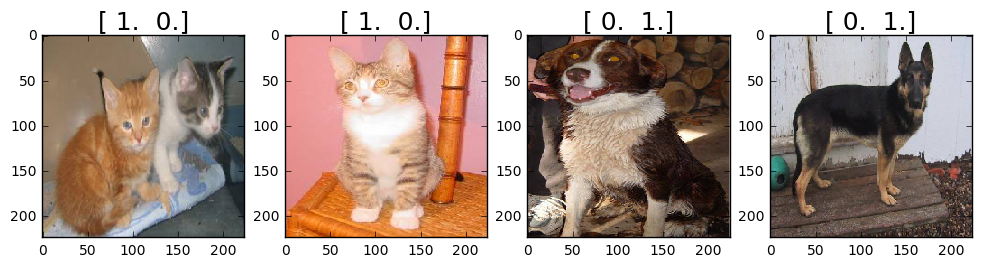

In [10]:
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [11]:
vgg.predict(imgs, True)

(array([ 0.4453,  0.7061,  0.4017,  0.9979], dtype=float32),
 array([281, 281, 232, 235]),
 [u'tabby', u'tabby', u'Border_collie', u'German_shepherd'])

In [9]:
# train model on sample set
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [10]:
vgg.finetune(batches)

In [11]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
160/160 [==============================] - 6s - loss: 1.8700 - acc: 0.6000 - val_loss: 0.5851 - val_acc: 0.7500


# Generate predictions

Generate predictions on the test data set using the model just created.

In [12]:
test_path = "/home/ubuntu/nbs/homeworks/dogscats_redux/test"
test_batches, preds = vgg.test(test_path, batch_size = batch_size*2)

Found 12500 images belonging to 1 classes.


## Prepare CSV

In [16]:
filenames = test_batches.filenames
ids = [filename.split('/')[1].split('.')[0] for filename in filenames]
isdog = preds[:,1]
pairs = zip(ids, isdog)
with open("/home/ubuntu/nbs/homeworks/dogscats_redux/submission_sample_data.csv", "w") as f:
    writer = csv.DictWriter(f, fieldnames=["id", "label"])
    writer.writeheader()
    writer = csv.writer(f, delimiter=",")
    writer.writerows(pairs)

# Generate predictions over the full dataset

Use the full training set to train the model and the full test set to test it.

In [13]:
path = "/home/ubuntu/nbs/homeworks/dogscats_redux/"

In [14]:
# train model on full training data
vgg = Vgg16()
batch_size=64
no_of_epochs=3
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_3 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Found 22800 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
# next: run finetune and fit; generate the csv submission

In [15]:
vgg.finetune(batches) # finetune

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

In [18]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print("Running epoch: %d" % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print("Completed %s fit operations" % no_of_epochs)

Running epoch: 0
Epoch 1/1
22800/22800 [==============================] - 623s - loss: 0.5177 - acc: 0.9595 - val_loss: 0.2586 - val_acc: 0.9805


NameError: name 'results_path' is not defined

In [14]:
test_path = "/home/ubuntu/nbs/hw1/test"
test_batches, preds = vgg.test(test_path, batch_size = batch_size*2) # predictions

Found 12500 images belonging to 1 classes.


In [15]:
filenames = test_batches.filenames
ids = [filename.split('/')[1].split('.')[0] for filename in filenames]
isdog = preds[:,1]
pairs = zip(ids, isdog)
with open("/home/ubuntu/nbs/hw1/cats_dogs_redux_submission.csv", "w") as f:
    writer = csv.DictWriter(f, fieldnames=["id", "label"])
    writer.writeheader()
    writer = csv.writer(f, delimiter=",")
    writer.writerows(pairs)